# Restaurant Revenue Prediction _ Regression Model

In [287]:
## import libraries and modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [288]:
## read Datasets
train=pd.read_csv(r"C:\Users\mshanka\Desktop\Res Revenue\datasets\train.csv")
test=pd.read_csv(r"C:\Users\mshanka\Desktop\Res Revenue\datasets\test.csv")

In [289]:
train.shape

(137, 43)

In [290]:
test.shape

(100000, 42)

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [292]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [293]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


Exploratory Data Analysis:

1. To check missing values
2. Check and analyse Numerical features
3. Check and analyse Categorical features

In [294]:
## To find the missing values in train data
train.isnull().sum().any()

False

 There are no missing values.


In [295]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  39


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [296]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 37


In [297]:
discrete_feature

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37']

In [298]:
train[discrete_feature].head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


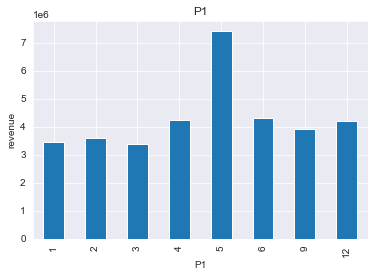

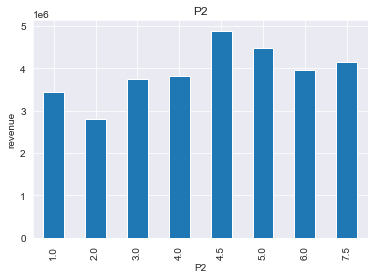

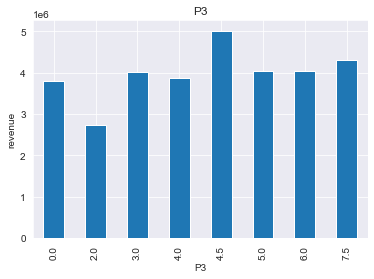

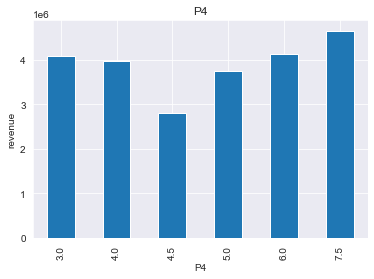

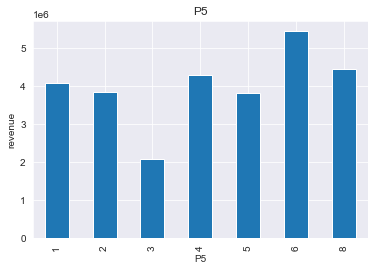

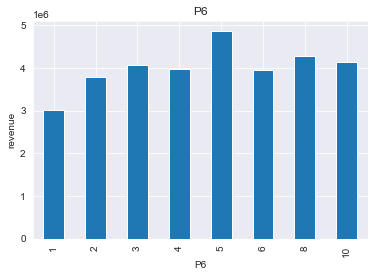

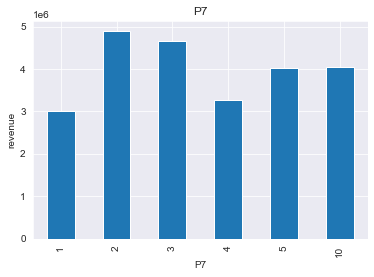

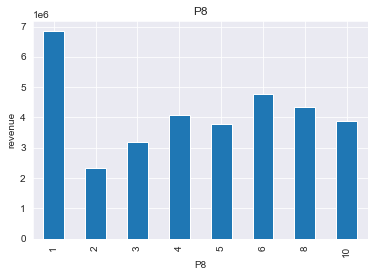

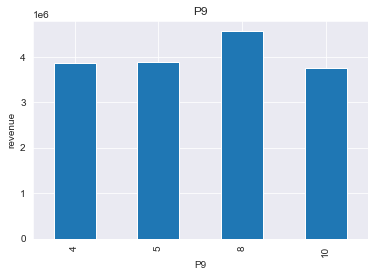

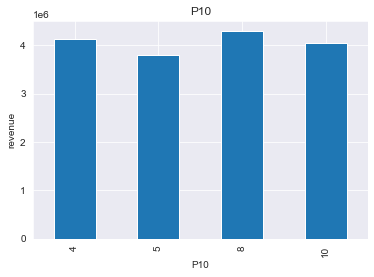

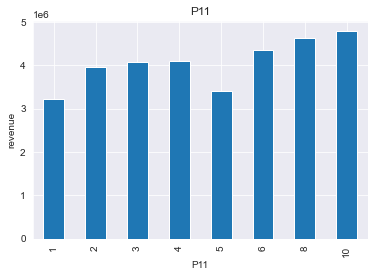

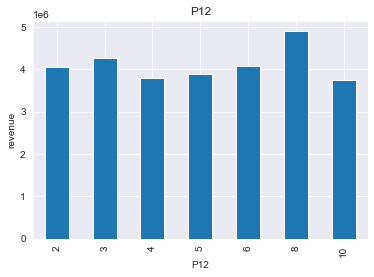

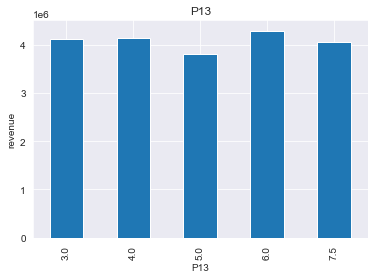

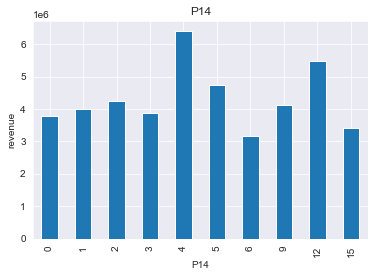

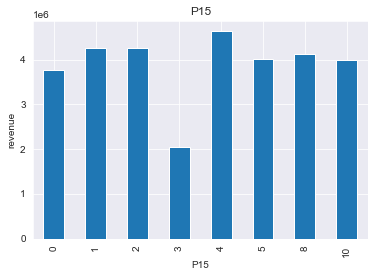

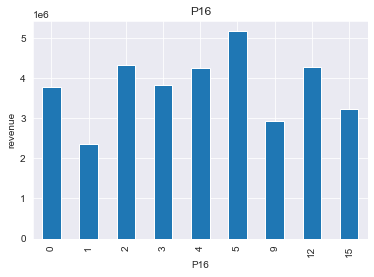

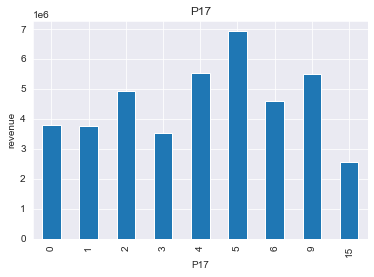

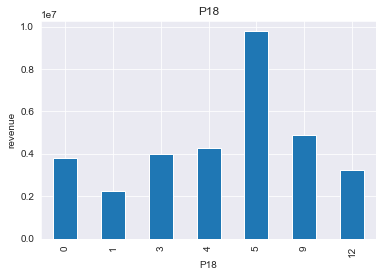

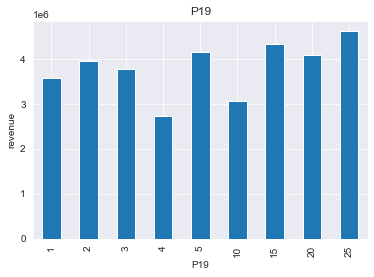

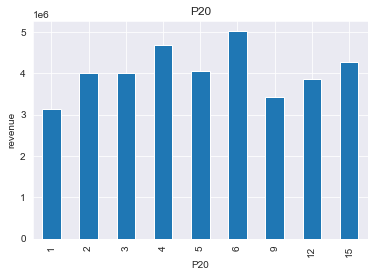

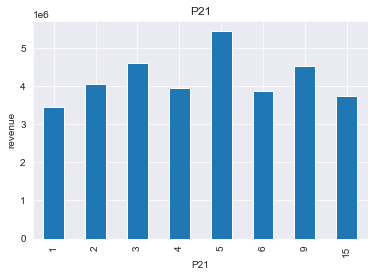

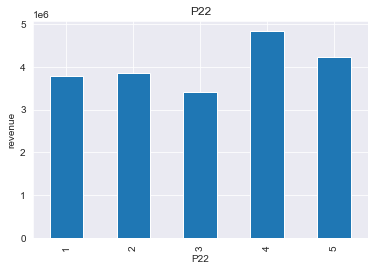

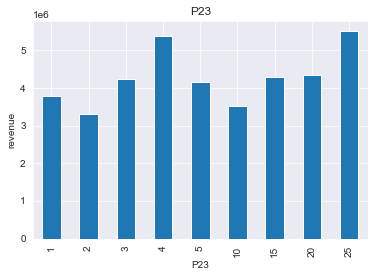

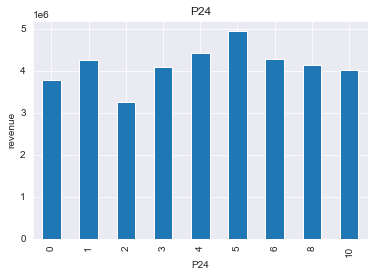

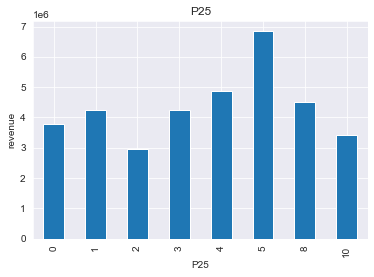

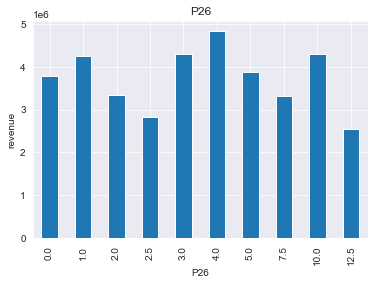

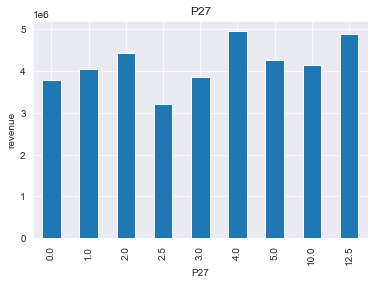

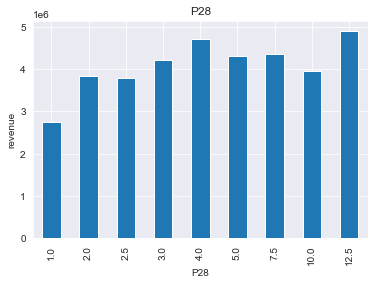

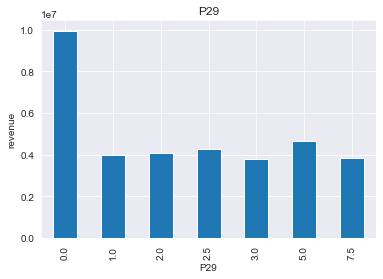

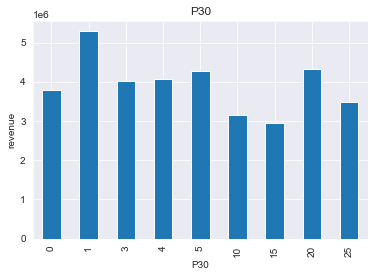

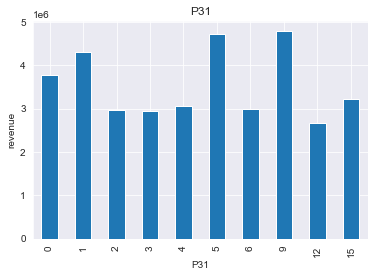

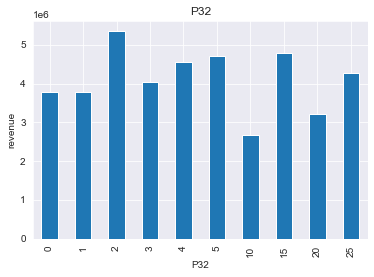

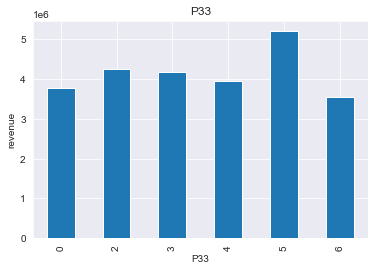

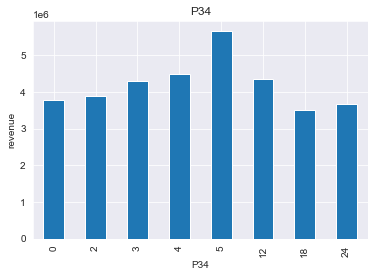

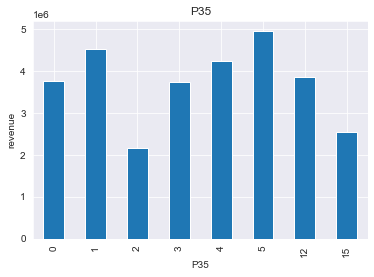

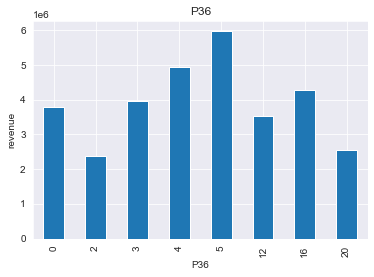

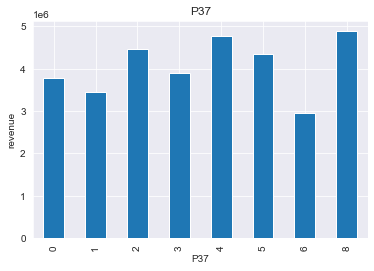

In [299]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['revenue'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('revenue')
    plt.title(feature)
    plt.show()

In [300]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [301]:
continuous_feature

['revenue']

 1.Column 'revenue' is our target column.
 
 2.Features from P1 to P37 are all numerical features about which we know nothing specifically. So, I will directly feed them      into my model.


In [302]:
## To check categorical features in train dataset

categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O' ]
categorical_features

['Open Date', 'City', 'City Group', 'Type']

In [303]:
categorical_features=categorical_features[1:]

In [304]:
categorical_features

['City', 'City Group', 'Type']

In [305]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))


The feature is City and number of categories are 34
The feature is City Group and number of categories are 2
The feature is Type and number of categories are 3


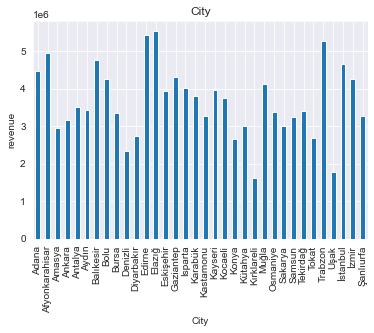

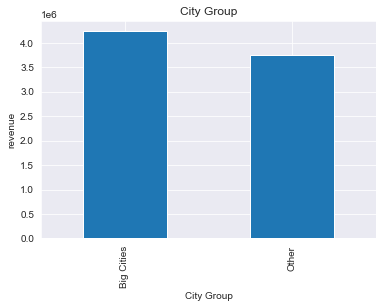

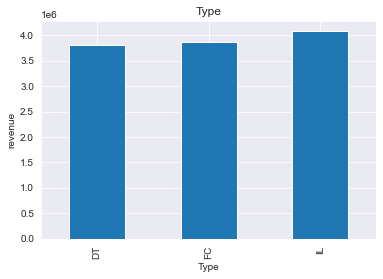

In [306]:
## relationship between categorical variable and dependent feature revenue

for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['revenue'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('revenue')
    plt.title(feature)
    plt.show()

Feature Engineering  : 

1. Id column is redundant, I will drop it. 
2. In feature Open date, I will focus on month and year and drop date values.
3. City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable    form which is numerical form.




In [307]:
# To remove the Id column from the dataset

train.drop('Id',axis=1,inplace=True)

In [308]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


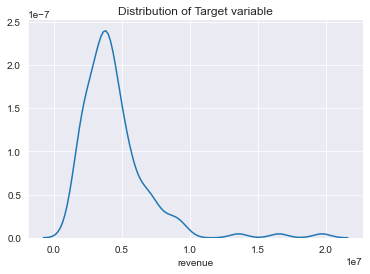

In [309]:
## To check distribution of target variable revenue
sns.distplot(train['revenue'],hist=False)
plt.title('Distribution of Target variable')
#to remove top and right spines
sns.despine()

If we remove outliers our target variable will follow a normal distribution.(with a little bit skew)

In [310]:
train = train[train['revenue']<8e+06].copy()

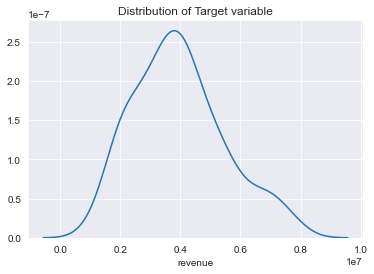

In [311]:
sns.distplot(train['revenue'],hist=False)
plt.title('Distribution of Target variable')
plt.show()

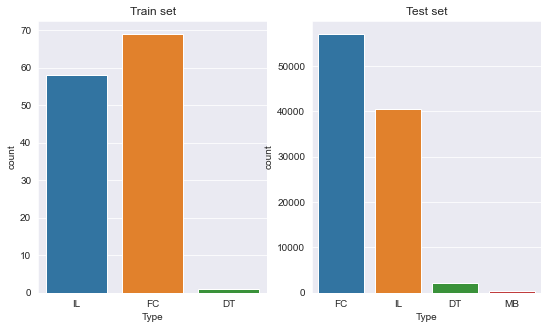

In [312]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(train.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(test.Type,ax=ax[1])
ax[1].set_title('Test set');

There is not even asingle observation of type 'MB' in training set. This is a problem for our model.

In [313]:
test.drop('Id',axis=1,inplace=True)

#Create a checkpoint so that we can easily access original dataset
df = pd.concat([train,test],axis=0)



In [314]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [315]:
df.shape

(100128, 42)

In [316]:
# Extracting month and year from date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Open Date'],axis=1,inplace=True)

Text(0.5, 1.0, 'Month-wise no of launches')

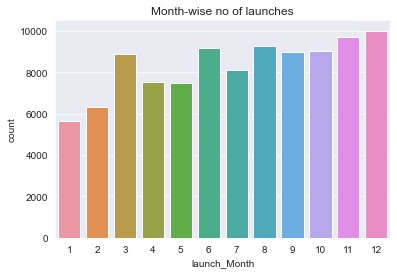

In [317]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches')

Second half of the year seems to witness more restaurant launches.

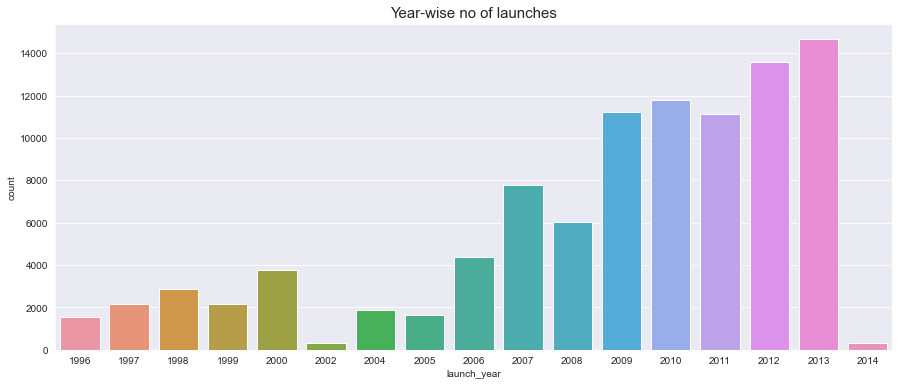

In [318]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

With time, number of restaurants in the area is increasing due to several social factors.

In [319]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [320]:
df['City Group'].value_counts()

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [321]:
df['City'].value_counts()

İstanbul    34130
Ankara       8739
İzmir        6472
Antalya      5915
Kocaeli      4365
            ...  
Amasya          1
Elazığ          1
Osmaniye        1
Tokat           1
Karabük         1
Name: City, Length: 63, dtype: int64

There are 63 different City values. I can create dummy variables to handle this feature but it will lead to so many columns. A good approach will be to reduce categories in this column. For example, instead of cities categories can be different zones or tier-1,tier-2 and so on. Here, I am dropping this column as there is not much information about which countries are involved. Also, the feature City Group covers effect of this feature as well.

In [322]:
df.drop('City',axis=1,inplace=True)

In [323]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [324]:
df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,launch_Month,launch_year
0,0,1,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,7,1999
1,0,0,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,2,2008
2,1,1,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,3,2013
3,1,1,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,2,2012
4,1,1,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,5,2009


In [325]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

Revenue is a bit higher in months of Jan, Sept and Nov.

In [326]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

Year 2000 has recorded highest revenues.


In [327]:
# creating dummy variables
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [328]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [329]:
processed_df.shape,processed_test_data.shape

((128, 70), (100000, 69))

Feature Selection:

1.Dropping constant features
2.Corrleation

There are no constant values in the data.

In [330]:
## Correlation

processed_df.corr()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
City Group,1.000000,-0.172323,-0.265303,-0.414037,-0.098884,-0.170363,0.007799,-0.420190,-0.197939,-0.090146,...,0.051988,-0.017771,-0.059852,-0.035588,-0.076003,-0.093989,0.174802,0.149729,0.053759,0.052201
Type,-0.172323,1.000000,0.167287,0.131003,0.081105,0.094855,0.105217,0.193163,0.144393,0.125389,...,-0.171020,0.022960,-0.008466,0.017684,0.010910,0.187448,-0.012993,-0.047053,0.090896,0.046405
P1,-0.265303,0.167287,1.000000,0.836649,0.698277,0.675100,0.312931,0.747893,0.853190,0.756335,...,-0.036805,0.099810,0.088181,-0.088797,0.078402,0.101976,-0.124989,0.045919,-0.124931,0.170110
P2,-0.414037,0.131003,0.836649,1.000000,0.474332,0.536300,0.209504,0.664652,0.769387,0.501637,...,-0.109201,0.103215,0.091131,-0.012036,0.060048,0.073553,-0.065274,-0.050740,-0.160569,0.134369
P3,-0.098884,0.081105,0.698277,0.474332,1.000000,0.444342,0.168873,0.566362,0.644871,0.685258,...,-0.004066,0.094708,0.102685,-0.120414,0.028883,0.074687,0.000343,0.103324,-0.124407,0.117365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
launch_Month_5,-0.093989,0.187448,0.101976,0.073553,0.074687,0.011475,0.017969,0.120595,0.085692,0.097971,...,-0.089261,-0.110030,-0.089261,-0.084746,-0.052285,1.000000,-0.080058,-0.075165,-0.113926,-0.080058
launch_Month_6,0.174802,-0.012993,-0.124989,-0.065274,0.000343,-0.006949,-0.005196,-0.097166,-0.127544,-0.093122,...,-0.084324,-0.103944,-0.084324,-0.080058,-0.049393,-0.080058,1.000000,-0.071007,-0.107624,-0.075630
launch_Month_7,0.149729,-0.047053,0.045919,-0.050740,0.103324,0.035229,-0.004879,0.007532,-0.018179,0.079890,...,-0.079169,-0.097590,-0.079169,-0.075165,-0.046374,-0.075165,-0.071007,1.000000,-0.101046,-0.071007
launch_Month_8,0.053759,0.090896,-0.124931,-0.160569,-0.124407,-0.024779,0.103962,-0.024848,-0.059659,-0.013172,...,-0.119996,-0.147916,-0.119996,-0.113926,-0.070288,-0.113926,-0.107624,-0.101046,1.000000,-0.107624


In [331]:
## Splitting the dataset for the model

from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [332]:
X_train.shape, processed_df.shape

((102, 69), (128, 70))

In [333]:
import keras

In [334]:
from keras.models import Sequential
from keras.layers import Dense

In [335]:

##Initialize the DNN
DN_model = Sequential()

# The Input Layer :
DN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
DN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
DN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
DN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
DN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
DN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
DN_model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               8960      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 257       
Total params: 173,825
Trainable params: 173,825
Non-trainable params: 0
_________________________________________________________________


In [336]:
## training the model

DN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)



Epoch 1/500
3/3 [==============================] - 1s 100ms/step - loss: 3867960.2500 - mean_absolute_error: 3867960.2500 - val_loss: 4172047.2500 - val_mean_absolute_error: 4172047.2500
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 3830445.5000 - mean_absolute_error: 3830445.5000 - val_loss: 4172045.2500 - val_mean_absolute_error: 4172045.2500
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 3871389.3750 - mean_absolute_error: 3871389.3750 - val_loss: 4172039.2500 - val_mean_absolute_error: 4172039.2500
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 3910656.0000 - mean_absolute_error: 3910656.0000 - val_loss: 4172026.7500 - val_mean_absolute_error: 4172026.7500
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 4004177.7500 - mean_absolute_error: 4004177.7500 - val_loss: 4171999.2500 - val_mean_absolute_error: 4171999.2500
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 39

3/3 [==============================] - 0s 8ms/step - loss: 1239713.5625 - mean_absolute_error: 1239713.5625 - val_loss: 1490361.5000 - val_mean_absolute_error: 1490361.5000
Epoch 90/500
3/3 [==============================] - 0s 8ms/step - loss: 1278830.0625 - mean_absolute_error: 1278830.0625 - val_loss: 1484322.5000 - val_mean_absolute_error: 1484322.5000
Epoch 91/500
3/3 [==============================] - 0s 8ms/step - loss: 1309208.5625 - mean_absolute_error: 1309208.5625 - val_loss: 1479958.1250 - val_mean_absolute_error: 1479958.1250
Epoch 92/500
3/3 [==============================] - 0s 6ms/step - loss: 1240278.0000 - mean_absolute_error: 1240278.0000 - val_loss: 1486166.3750 - val_mean_absolute_error: 1486166.3750
Epoch 93/500
3/3 [==============================] - 0s 8ms/step - loss: 1182172.5938 - mean_absolute_error: 1182172.5938 - val_loss: 1494295.3750 - val_mean_absolute_error: 1494295.3750
Epoch 94/500
3/3 [==============================] - 0s 8ms/step - loss: 1217429.468

Epoch 133/500
3/3 [==============================] - 0s 6ms/step - loss: 969138.4219 - mean_absolute_error: 969138.4219 - val_loss: 1463680.2500 - val_mean_absolute_error: 1463680.2500
Epoch 134/500
3/3 [==============================] - 0s 8ms/step - loss: 1051839.6875 - mean_absolute_error: 1051839.6875 - val_loss: 1469249.7500 - val_mean_absolute_error: 1469249.7500
Epoch 135/500
3/3 [==============================] - 0s 8ms/step - loss: 1009777.2344 - mean_absolute_error: 1009777.2344 - val_loss: 1469683.7500 - val_mean_absolute_error: 1469683.7500
Epoch 136/500
3/3 [==============================] - 0s 8ms/step - loss: 1066322.7188 - mean_absolute_error: 1066322.7188 - val_loss: 1466001.5000 - val_mean_absolute_error: 1466001.5000
Epoch 137/500
3/3 [==============================] - 0s 8ms/step - loss: 1046895.4688 - mean_absolute_error: 1046895.4688 - val_loss: 1462246.1250 - val_mean_absolute_error: 1462246.1250
Epoch 138/500
3/3 [==============================] - 0s 8ms/step - 

3/3 [==============================] - 0s 6ms/step - loss: 851075.5625 - mean_absolute_error: 851075.5625 - val_loss: 1566462.8750 - val_mean_absolute_error: 1566462.8750
Epoch 222/500
3/3 [==============================] - 0s 8ms/step - loss: 823023.2969 - mean_absolute_error: 823023.2969 - val_loss: 1571453.7500 - val_mean_absolute_error: 1571453.7500
Epoch 223/500
3/3 [==============================] - 0s 8ms/step - loss: 826929.9375 - mean_absolute_error: 826929.9375 - val_loss: 1570390.1250 - val_mean_absolute_error: 1570390.1250
Epoch 224/500
3/3 [==============================] - 0s 7ms/step - loss: 860335.0156 - mean_absolute_error: 860335.0156 - val_loss: 1575262.1250 - val_mean_absolute_error: 1575262.1250
Epoch 225/500
3/3 [==============================] - 0s 8ms/step - loss: 776655.8750 - mean_absolute_error: 776655.8750 - val_loss: 1577164.2500 - val_mean_absolute_error: 1577164.2500
Epoch 226/500
3/3 [==============================] - 0s 8ms/step - loss: 799980.0156 - me

Epoch 309/500
3/3 [==============================] - 0s 8ms/step - loss: 714437.0000 - mean_absolute_error: 714437.0000 - val_loss: 1583477.3750 - val_mean_absolute_error: 1583477.3750
Epoch 310/500
3/3 [==============================] - 0s 8ms/step - loss: 682927.0469 - mean_absolute_error: 682927.0469 - val_loss: 1581175.1250 - val_mean_absolute_error: 1581175.1250
Epoch 311/500
3/3 [==============================] - 0s 8ms/step - loss: 751476.1875 - mean_absolute_error: 751476.1875 - val_loss: 1581692.6250 - val_mean_absolute_error: 1581692.6250
Epoch 312/500
3/3 [==============================] - 0s 6ms/step - loss: 671908.4688 - mean_absolute_error: 671908.4688 - val_loss: 1580527.2500 - val_mean_absolute_error: 1580527.2500
Epoch 313/500
3/3 [==============================] - 0s 8ms/step - loss: 715063.3594 - mean_absolute_error: 715063.3594 - val_loss: 1585172.7500 - val_mean_absolute_error: 1585172.7500
Epoch 314/500
3/3 [==============================] - 0s 6ms/step - loss: 68

3/3 [==============================] - 0s 8ms/step - loss: 560055.9766 - mean_absolute_error: 560055.9766 - val_loss: 1540512.2500 - val_mean_absolute_error: 1540512.2500
Epoch 398/500
3/3 [==============================] - 0s 8ms/step - loss: 567805.7344 - mean_absolute_error: 567805.7344 - val_loss: 1542651.8750 - val_mean_absolute_error: 1542651.8750
Epoch 399/500
3/3 [==============================] - 0s 8ms/step - loss: 611343.2812 - mean_absolute_error: 611343.2812 - val_loss: 1543583.7500 - val_mean_absolute_error: 1543583.7500
Epoch 400/500
3/3 [==============================] - 0s 8ms/step - loss: 658140.3594 - mean_absolute_error: 658140.3594 - val_loss: 1542766.5000 - val_mean_absolute_error: 1542766.5000
Epoch 401/500
3/3 [==============================] - 0s 8ms/step - loss: 620771.1250 - mean_absolute_error: 620771.1250 - val_loss: 1540390.2500 - val_mean_absolute_error: 1540390.2500
Epoch 402/500
3/3 [==============================] - 0s 8ms/step - loss: 627731.9688 - me

3/3 [==============================] - 0s 8ms/step - loss: 576504.3438 - mean_absolute_error: 576504.3438 - val_loss: 1539928.2500 - val_mean_absolute_error: 1539928.2500
Epoch 486/500
3/3 [==============================] - 0s 8ms/step - loss: 600262.5781 - mean_absolute_error: 600262.5781 - val_loss: 1540097.6250 - val_mean_absolute_error: 1540097.6250
Epoch 487/500
3/3 [==============================] - 0s 8ms/step - loss: 550111.2109 - mean_absolute_error: 550111.2109 - val_loss: 1538262.2500 - val_mean_absolute_error: 1538262.2500
Epoch 488/500
3/3 [==============================] - 0s 8ms/step - loss: 554314.4375 - mean_absolute_error: 554314.4375 - val_loss: 1539317.3750 - val_mean_absolute_error: 1539317.3750
Epoch 489/500
3/3 [==============================] - 0s 6ms/step - loss: 554201.4531 - mean_absolute_error: 554201.4531 - val_loss: 1539732.1250 - val_mean_absolute_error: 1539732.1250
Epoch 490/500
3/3 [==============================] - 0s 8ms/step - loss: 539165.5625 - me

In [337]:
predictions = DN_model.predict(X_test)

In [338]:
model_1=mean_absolute_error(predictions,y_test)

In [339]:
model_1

1417161.6009615385

In [258]:
##converting the data to arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test=np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [259]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [274]:
##Initializing the model and layers of LSTM
regressor = Sequential()

#Input layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
##compiling the neural network
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
##training the  model
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 4s 48ms/step - loss: 4053026.1500
Epoch 2/100
4/4 [==============================] - 0s 47ms/step - loss: 4027117.4500
Epoch 3/100
4/4 [==============================] - 0s 48ms/step - loss: 3953180.6500
Epoch 4/100
4/4 [==============================] - 0s 45ms/step - loss: 3951955.2500
Epoch 5/100
4/4 [==============================] - 0s 47ms/step - loss: 3859034.1000
Epoch 6/100
4/4 [==============================] - 0s 48ms/step - loss: 3860594.1000
Epoch 7/100
4/4 [==============================] - 0s 48ms/step - loss: 4015547.4000
Epoch 8/100
4/4 [==============================] - 0s 47ms/step - loss: 3949252.7000
Epoch 9/100
4/4 [==============================] - 0s 48ms/step - loss: 4070195.1000
Epoch 10/100
4/4 [==============================] - 0s 48ms/step - loss: 4016758.9500
Epoch 11/100
4/4 [==============================] - 0s 47ms/step - loss: 4009985.9000
Epoch 12/100
4/4 [==============================] - 0s 47ms/ste

In [275]:
predictions = regressor.predict(X_test)

In [276]:
predictions

array([[29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784],
       [29.858784]], dtype=float32)

In [277]:
model_2=mean_absolute_error(predictions,y_test)

In [278]:
model_2

3943612.410447047

For the above dataset, two models are used i.e, ANN and LSTM. In that we received better accuracy with ANN model.